In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
data = pd.read_csv('/content/SeoulBikeData (1).csv', encoding = 'unicode_escape', parse_dates = [0])

In [ ]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
data.shape

(8760, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
%load_ext google.colab.data_table

data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Our objective is to find the a way to estimate value prediction of bike count required at each hour for the supply of the 
#the rental bike, using the values in the other column.
# If we can do so far the historical data, then we should able to estimate the bike count, required at each hour


print('DUplicate values of the column', len(data[data.duplicated()]))


DUplicate values of the column 0


In [ ]:
# Cutome funciton will be created for finding null values, Dtype, unique values
def datainfo():
  temp_val = pd.DataFrame(index = data.columns) # it will make column on index position
  temp_val['Datatype'] = data.dtypes
  temp_val['count_null_values'] = data.count()
  temp_val['Unique_values'] = data.nunique()
  temp_val['NaN_values'] = data.isnull().sum()
  return temp_val

In [ ]:
print(datainfo())

                                 Datatype  count_null_values  Unique_values  \
Date                       datetime64[ns]               8760            365   
Rented Bike Count                   int64               8760           2166   
Hour                                int64               8760             24   
Temperature(°C)                   float64               8760            546   
Humidity(%)                         int64               8760             90   
Wind speed (m/s)                  float64               8760             65   
Visibility (10m)                    int64               8760           1789   
Dew point temperature(°C)         float64               8760            556   
Solar Radiation (MJ/m2)           float64               8760            345   
Rainfall(mm)                      float64               8760             61   
Snowfall (cm)                     float64               8760             51   
Seasons                            object           

In [ ]:
# The insights we got from the data
'''
We have 8760 rows and 15 columns
we have no null vlaues
we have 10 numeric columns
we have 4 categorical columns
we have unique count -> sesason-4, holiday- 2, functioning day - 2

'''

'\nWe have 8760 rows and 15 columns\nwe have no null vlaues\nwe have 10 numeric columns\nwe have 4 categorical columns\nwe have unique count -> sesason-4, holiday- 2, functioning day - 2\n\n'

In [ ]:
data.describe().T

'''
This helps us to gather the information about descriptive statistics
Where we will get mean, median, mode and min value, max value, 25%, 50%, 75% values
'''

'\nThis helps us to gather the information about descriptive statistics\nWhere we will get mean, median, mode and min value, max value, 25%, 50%, 75% values\n'

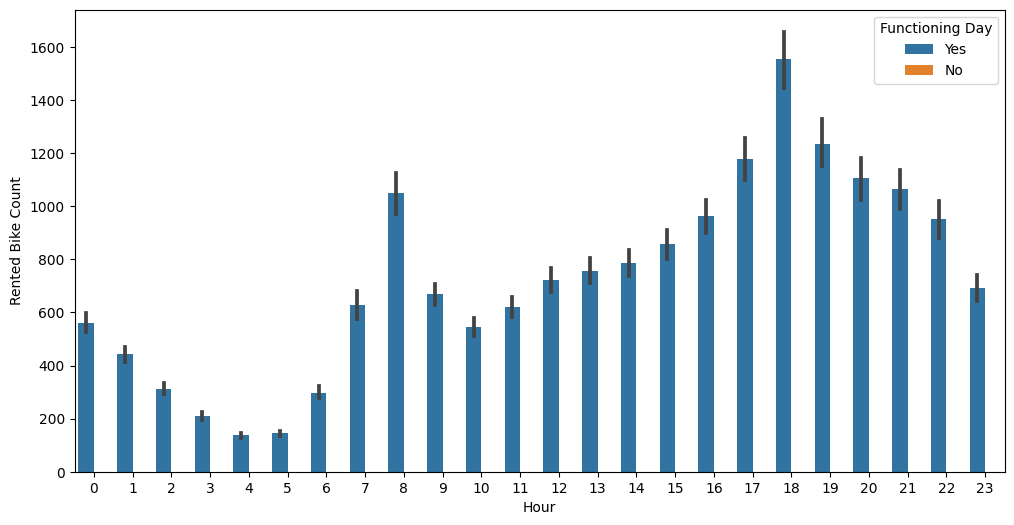

In [ ]:
def barplot(x,y,hue):
  plt.figure(figsize = (12,6))
  sns.barplot(x=x, y=y, hue = hue, data = data)

barplot('Hour', 'Rented Bike Count', 'Functioning Day')



In [ ]:
data.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

Functioning Day  Rented Bike Count
0             Yes            6172314
1              No                  0

In [ ]:
# Removing data of non-  functional days (non rented days)
df = data.drop(data[data['Functioning Day'] =='No'].index )

In [ ]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Due to not usefull in functioning day column, remove function day column
df1 = df.drop(['Functioning Day'], axis = 1)
df1.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  
0                      0.0           0.0            0.0  Winter  No Holiday  
1                      0.0           0.0            0.0  Winter  No Holiday  
2                      0.0           0.0            0.0  Winter  No Holiday  
3                      0.0           0.0            0.0  Winter  No Holiday  
4                      0.0           0.0            0.0  Winter  No Holiday

In [ ]:
# Converting date column to date, 

df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8465, dtype: datetime64[ns]

In [ ]:
# Sepearte the month, day, year from the DatasFrame columns

df1['Day'] = df1['Date'].dt.day
df1['month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

In [ ]:
df1.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

   Day  month  Year  
0   12      1  2017  
1   12      1  2017  
2   12      1  2017  
3   12      1  2017  
4   12      1  2017

In [ ]:
# We will drop the data column after getting all the neccessary informations

df1.drop(columns = ['Date'], inplace = True)
df1.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday  Day  month  Year  
0           0.0            0.0  Winter  No Holiday   12      1  2017  
1           0.0            0.0  Winter  No Holiday   12      1  2017  
2           0.0            0.0  Winter  No Holiday   12      1  2017  
3           0.0            0.0  Winter  No Holiday   12      1  2017  
4           0.0            0.0  Winter  No Holiday   12      1  2017

In [ ]:
# EDA(Exploratory Data Analysis and visulization)
"""
Let' explore the data and visulize the distribution of the data of different columns, We will also find the relationship between 
'Rented Bike Count' column and the other columns
"""
# Checking the correlation data
# Corr() is used to test the hypothesis of cause and effect of the relationship between the varaibles.Correlation often used to find the 
# trent in the real world problem


"\nLet' explore the data and visulize the distribution of the data of different columns, We will also find the relationship between \n'Rented Bike Count' column and the other columns\n"

<Axes: >

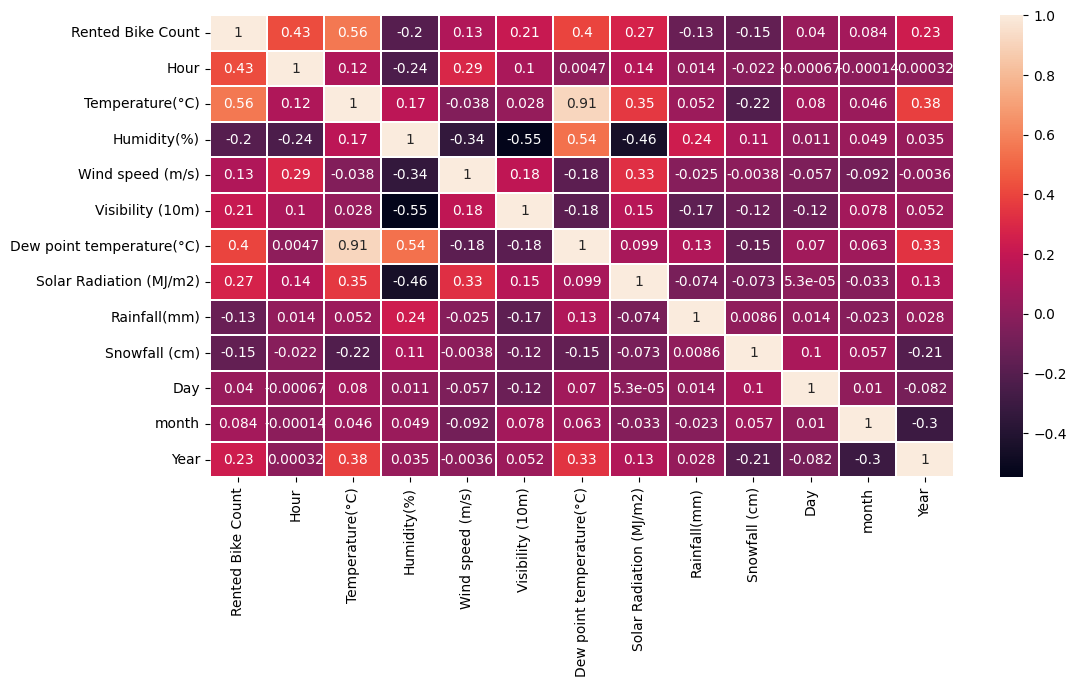

In [ ]:
data_corr = df1.corr()
plt.figure(figsize = (12,6))

sns.heatmap(data_corr, annot= True, linewidths = 0.1, linecolor = 'white' )

In [ ]:
df1.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Day', 'month', 'Year'],
      dtype='object')

In [ ]:
df2 = df1.drop(['Seasons','Holiday','Dew point temperature(°C)'], axis = 1)
df2.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Day  month  Year  
0   12      1  2017  
1   12      1  2017  
2   12      1  2017  
3   12      1  2017  
4   12      1  2017

<Axes: >

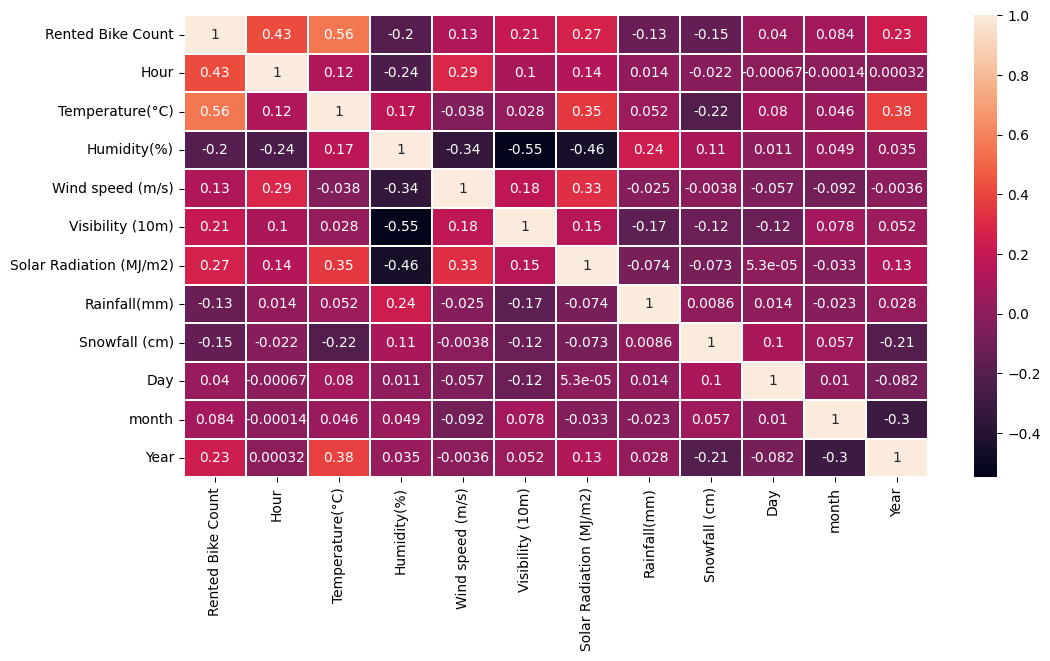

In [ ]:
data_corr = df2.corr()
plt.figure(figsize = (12,6))
sns.heatmap(data_corr, linewidths = 0.1, linecolor = 'white', annot = True)

In [ ]:
# Seperating numerical values from our table

numerical_values = [col for col in df2.columns if df2[col].dtype !='0']
numerical_values

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'month',
 'Year']

0 Rented Bike Count
1 Hour
2 Temperature(°C)
3 Humidity(%)
4 Wind speed (m/s)
5 Visibility (10m)
6 Solar Radiation (MJ/m2)
7 Rainfall(mm)
8 Snowfall (cm)
9 Day
10 month
11 Year


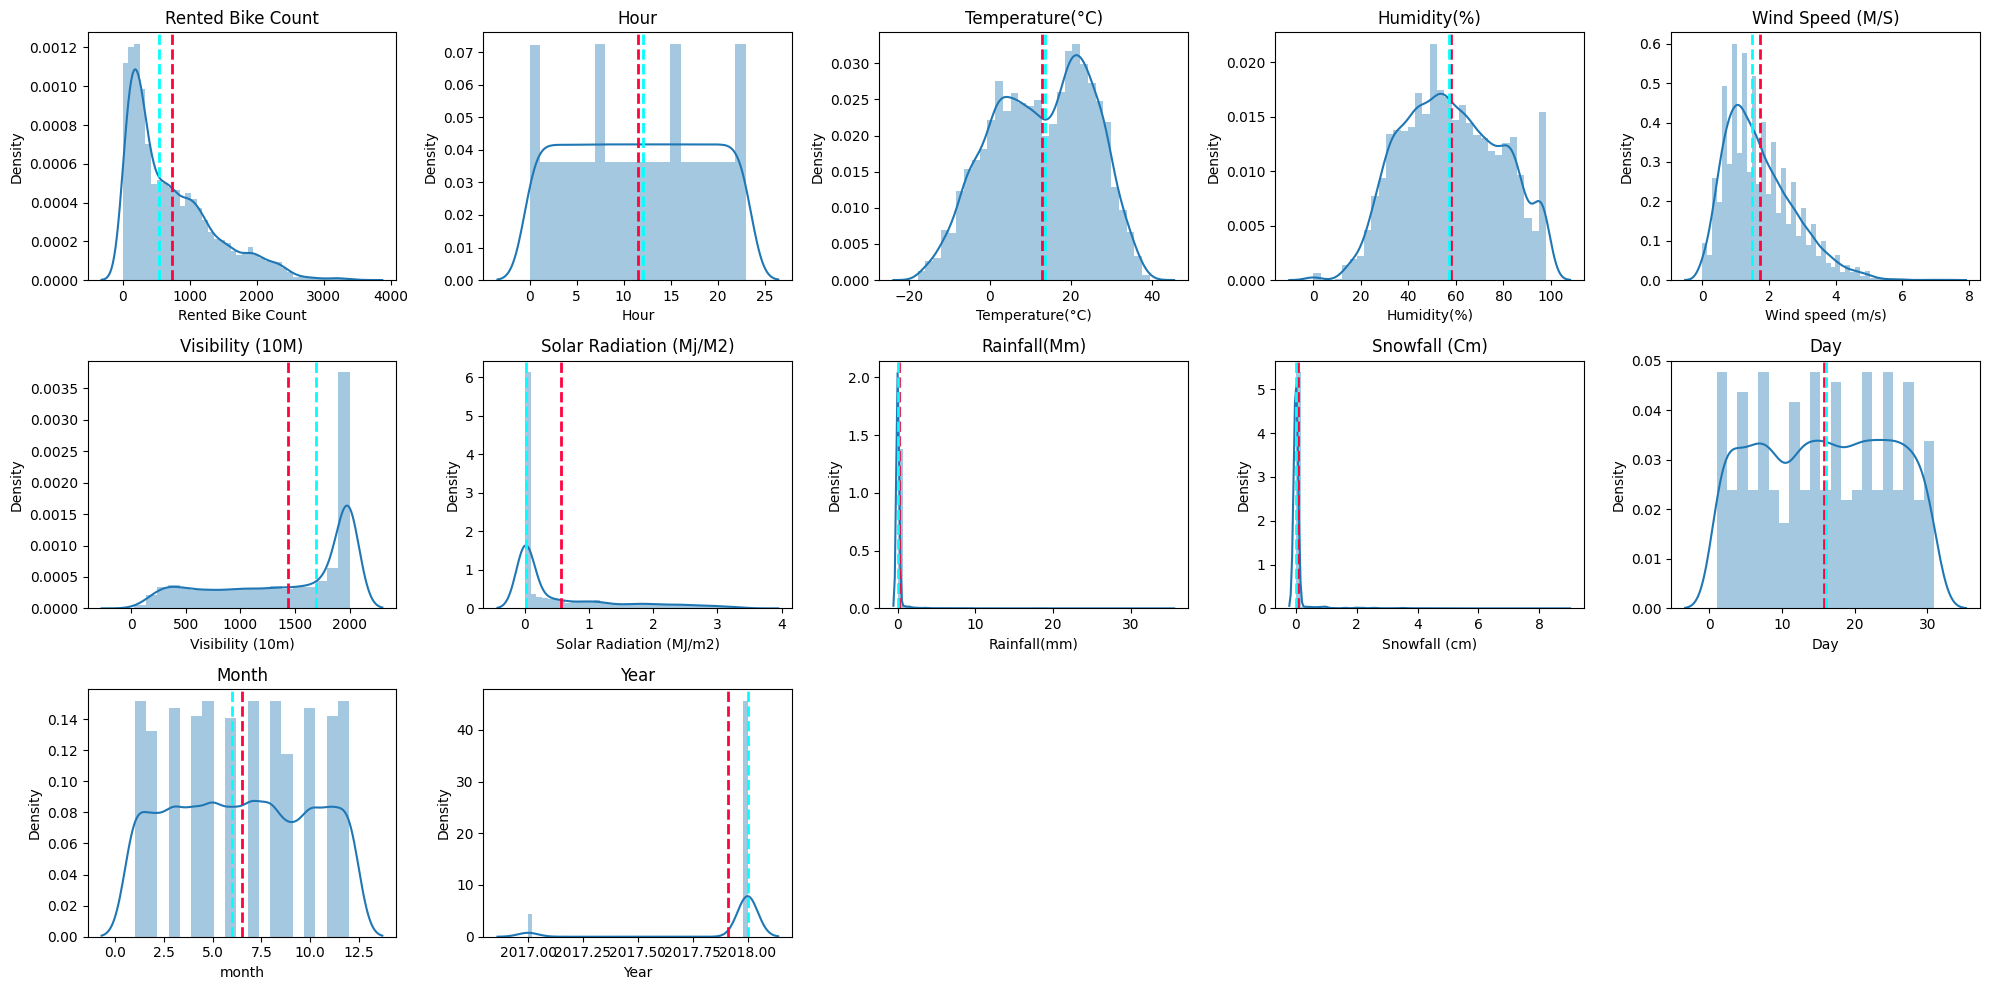

In [ ]:
"""
Checking data distribution of each column we have to plot on graph
"""

fig = plt.figure(figsize = (20,10))

for index, column in enumerate(numerical_values):
  print(index, column)
  plt.subplot(3,5, index+1)
  sns.distplot(df2[column])
  feature = df1[column]

  ax = fig.gca()
  ax.axvline(feature.mean(), color = '#ff033e', linestyle = 'dashed', linewidth = 2)
  ax.axvline(feature.median(), color = '#00ffff', linestyle = 'dashed', linewidth = 2)

  plt.title(f'{column.title()}')
  plt.tight_layout()



In [ ]:
df2.agg(['skew', 'kurtosis']).T

skew    kurtosis
Rented Bike Count         1.139700    0.820305
Hour                     -0.001261   -1.203446
Temperature(°C)          -0.174550   -0.889578
Humidity(%)               0.068649   -0.812228
Wind speed (m/s)          0.894222    0.754256
Visibility (10m)         -0.695306   -0.969125
Solar Radiation (MJ/m2)   1.510065    1.145102
Rainfall(mm)             14.616921  289.963779
Snowfall (cm)             8.292830   90.542378
Day                      -0.019049   -1.198170
month                     0.012911   -1.204497
Year                     -2.911538    6.478584

Right/ positive skewed distribution : - Mode<median<Mean: rented bike count, wind speed(m/s), Solar Radiation(MJ/m2) <br>
No sckew  : mean = median = mode<br>
left/negative sckewed distribution = mean> meandin>mode 



In [ ]:
# For categorical data
categorical_features = [col for col in df1.columns if df1[col].dtype =='0']
categorical_features

[]

In [ ]:
# Grouping by season and calculating the total rented bike count
data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

Seasons  Rented Bike Count
0  Summer            2283234
1  Autumn            1790002
2  Spring            1611909
3  Winter             487169

In [ ]:
# Groupby holdiay and calculating the total rented bike count
data.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

Holiday  Rented Bike Count
0  No Holiday            5956419
1     Holiday             215895

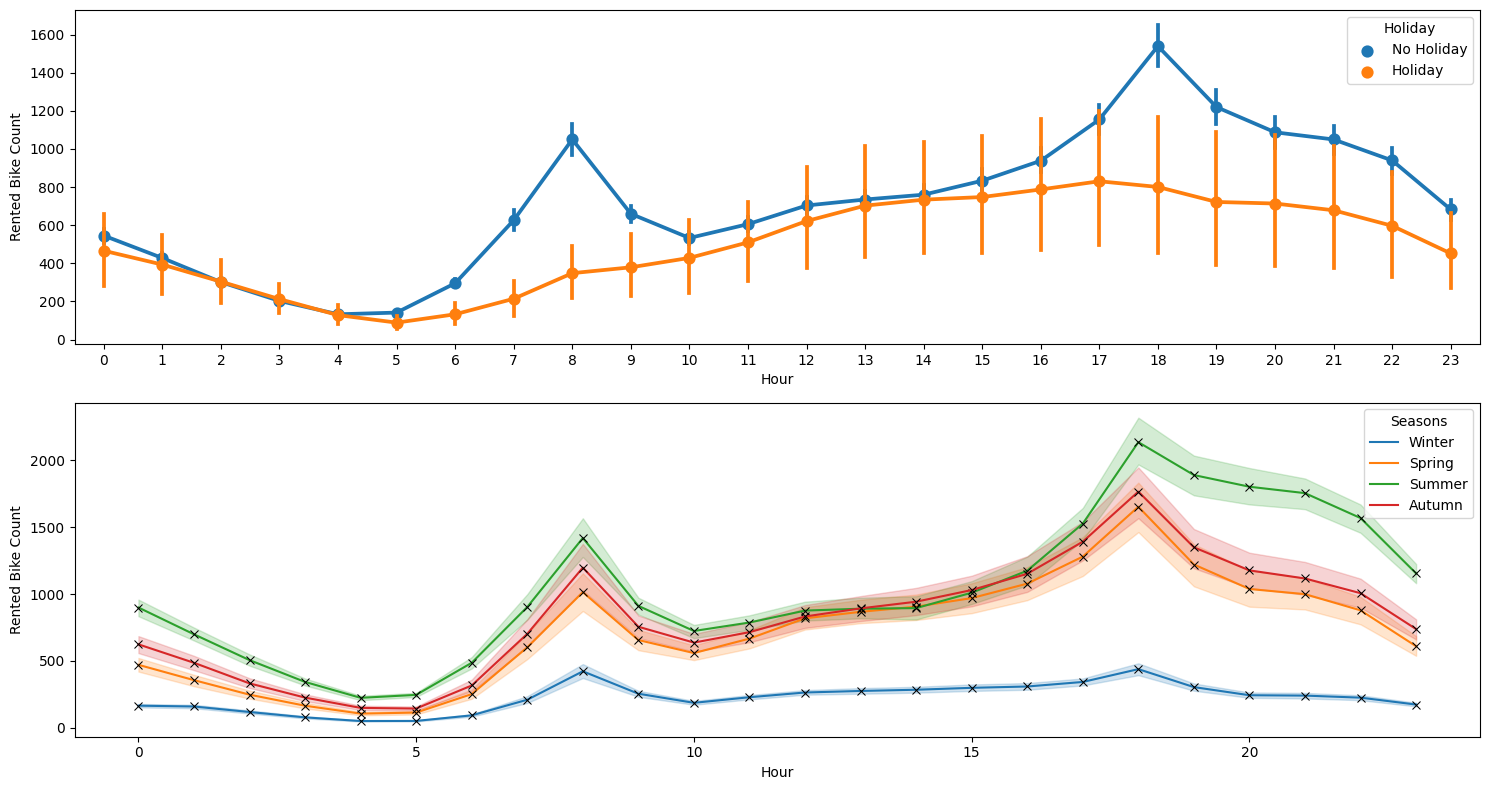

In [ ]:
# Find out the relationship between 
fig,axs = plt.subplots(nrows = 2, ncols = 1, figsize = (15,8), dpi = 100)
sns.pointplot(data=data, x = "Hour", y = "Rented Bike Count" , ax = axs[0], hue = 'Holiday')
sns.lineplot(data = data, x = "Hour", y = "Rented Bike Count", ax = axs[1], hue = "Seasons", marker = "x", markeredgecolor = "black")
plt.tight_layout()

In [ ]:
# Feature engineering we have to Encode our Categorical data to numerical data which will be in form of (0,1)
# one-hot-encoder(), pd.get_dummies(), LabelEncoder Data
# Scale vlaues in numeric columns to a(0,1) range.
# Split the datset into training and test data

In [ ]:
# (season-> winter, summer, spring, autumn) -> 0,1,2,3
# (seasons - >winter ,summer, spring, autumn) -> it will create columns for each and every values

df1.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Day', 'month', 'Year'],
      dtype='object')

In [ ]:
df1 = df1.drop(['Dew point temperature(°C)'], axis = 1)

In [ ]:
df1.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Day', 'month',
       'Year'],
      dtype='object')

In [ ]:
# we will apply one-hot encoder on our dataset
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

  Seasons     Holiday  Day  month  Year  
0  Winter  No Holiday   12      1  2017  
1  Winter  No Holiday   12      1  2017  
2  Winter  No Holiday   12      1  2017  
3  Winter  No Holiday   12      1  2017  
4  Winter  No Holiday   12      1  2017

In [ ]:
label_encoder_df = df1.apply(LabelEncoder().fit_transform)
label_encoder_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   252     0              111           28                22   
1                   202     1              108           29                 8   
2                   171     2              103           30                10   
3                   105     3              101           31                 9   
4                    76     4              103           27                23   
...                 ...   ...              ...          ...               ...   
8755                990    19              205           25                26   
8756                754    20              197           28                23   
8757                685    21              189           30                 3   
8758                703    22              184           32                10   
8759                579    23              182           34                13   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 1779                        0             0              0   
1                 1779                        0             0              0   
2                 1779                        0             0              0   
3                 1779                        0             0              0   
4                 1779                        0             0              0   
...                ...                      ...           ...            ...   
8755              1673                        0             0              0   
8756              1779                        0             0              0   
8757              1747                        0             0              0   
8758              1639                        0             0              0   
8759              1688                        0             0              0   

      Seasons  Holiday  Day  month  Year  
0           3        1   11      0     0  
1           3        1   11      0     0  
2           3        1   11      0     0  
3           3        1   11      0     0  
4           3        1   11      0     0  
...       ...      ...  ...    ...   ...  
8755        0        1   29     10     1  
8756        0        1   29     10     1  
8757        0        1   29     10     1  
8758        0        1   29     10     1  
8759        0        1   29     10     1  

[8465 rows x 14 columns]

In [ ]:
# Checking season column data
df1.groupby("Seasons").count().T # we are checking raw data 

Seasons                  Autumn  Spring  Summer  Winter
Rented Bike Count          1937    2160    2208    2160
Hour                       1937    2160    2208    2160
Temperature(°C)            1937    2160    2208    2160
Humidity(%)                1937    2160    2208    2160
Wind speed (m/s)           1937    2160    2208    2160
Visibility (10m)           1937    2160    2208    2160
Solar Radiation (MJ/m2)    1937    2160    2208    2160
Rainfall(mm)               1937    2160    2208    2160
Snowfall (cm)              1937    2160    2208    2160
Holiday                    1937    2160    2208    2160
Day                        1937    2160    2208    2160
month                      1937    2160    2208    2160
Year                       1937    2160    2208    2160

In [ ]:
label_encoder_df.groupby('Seasons').count().T

Seasons                     0     1     2     3
Rented Bike Count        1937  2160  2208  2160
Hour                     1937  2160  2208  2160
Temperature(°C)          1937  2160  2208  2160
Humidity(%)              1937  2160  2208  2160
Wind speed (m/s)         1937  2160  2208  2160
Visibility (10m)         1937  2160  2208  2160
Solar Radiation (MJ/m2)  1937  2160  2208  2160
Rainfall(mm)             1937  2160  2208  2160
Snowfall (cm)            1937  2160  2208  2160
Holiday                  1937  2160  2208  2160
Day                      1937  2160  2208  2160
month                    1937  2160  2208  2160
Year                     1937  2160  2208  2160

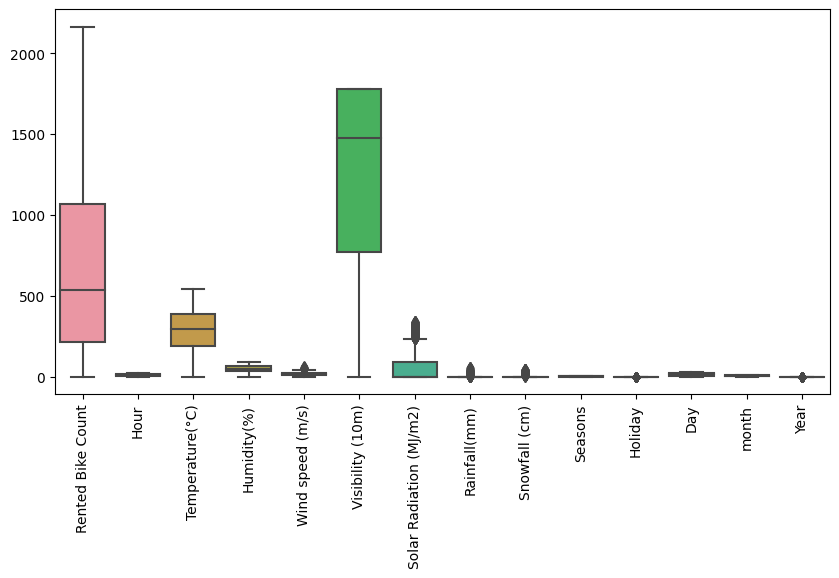

In [ ]:
# Checking Distribution and outliers on DataFrame

plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.boxplot(data = label_encoder_df)
plt.show()

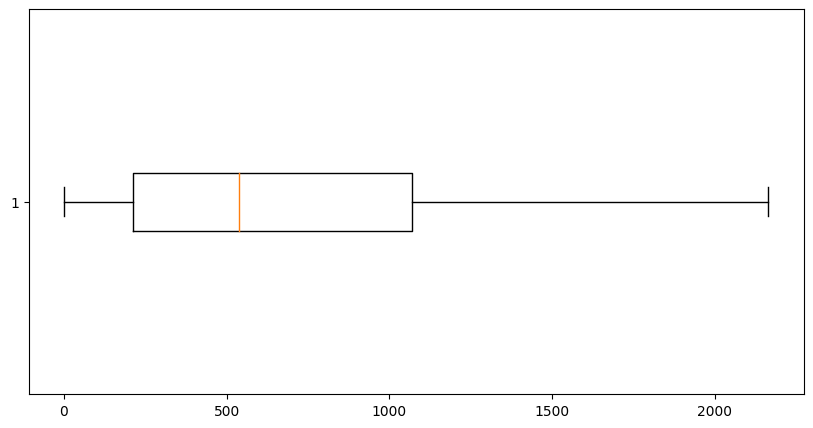

In [ ]:
plt.figure(figsize = (10,5))
plt.boxplot(label_encoder_df['Rented Bike Count'], vert = False)
plt.show()

Text(0.5, 1.0, 'cube root')

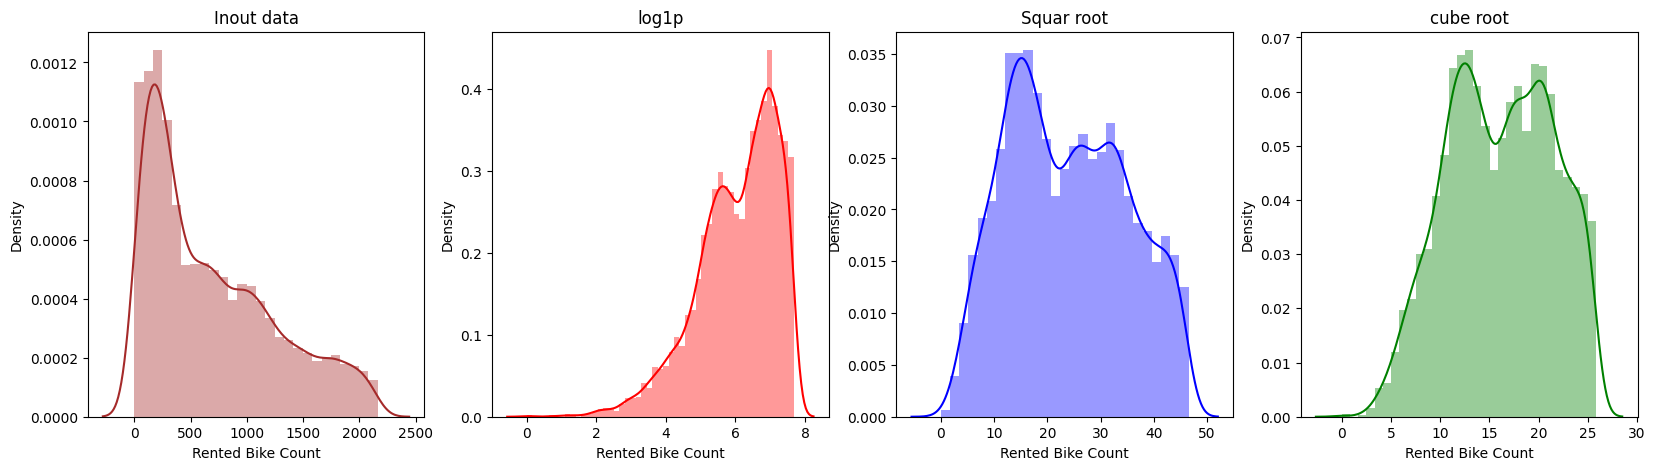

In [ ]:
# We have to transform our data to make it normally distributed using, square root transformation, 
#log transformation,cube root tranformmation
fig ,axes = plt.subplots(1,4, figsize = (20,5))
sns.distplot((label_encoder_df['Rented Bike Count']), ax = axes[0], color = 'Brown').set_title("Inout data")
sns.distplot(np.log1p(label_encoder_df['Rented Bike Count']+0.000), ax = axes[1], color = 'red').set_title('log1p')
sns.distplot(np.sqrt(label_encoder_df['Rented Bike Count']), ax = axes[2], color = 'blue').set_title('Squar root')
sns.distplot(np.cbrt(label_encoder_df['Rented Bike Count'])*2, ax = axes[3], color = 'green').set_title('cube root')

In [ ]:
import scipy.stats as stats

In [ ]:
def plotvraiable(df, variable):
  plt.figure(figsize = (10,5))
  plt.subplot(1,2,1) # means 1 eow, 2 columns and 1st plot
  df[variable].hist(bins = 30)

  # QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist = 'norm', plot = plt)
  plt.show()

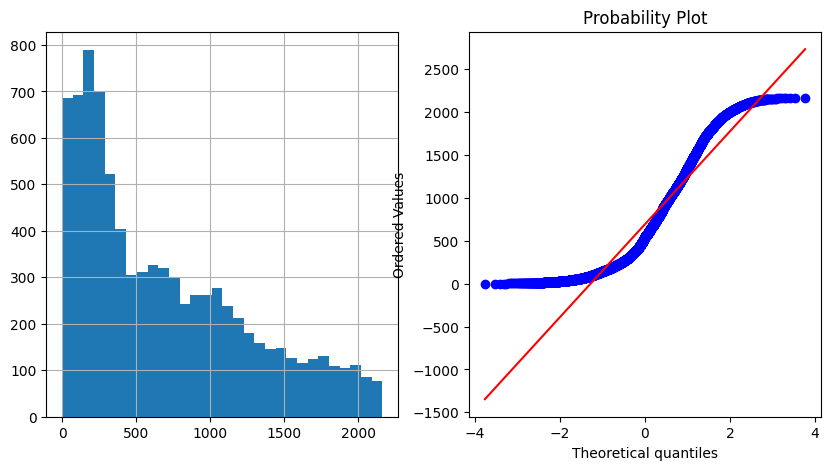

In [ ]:
plotvraiable(label_encoder_df, 'Rented Bike Count')

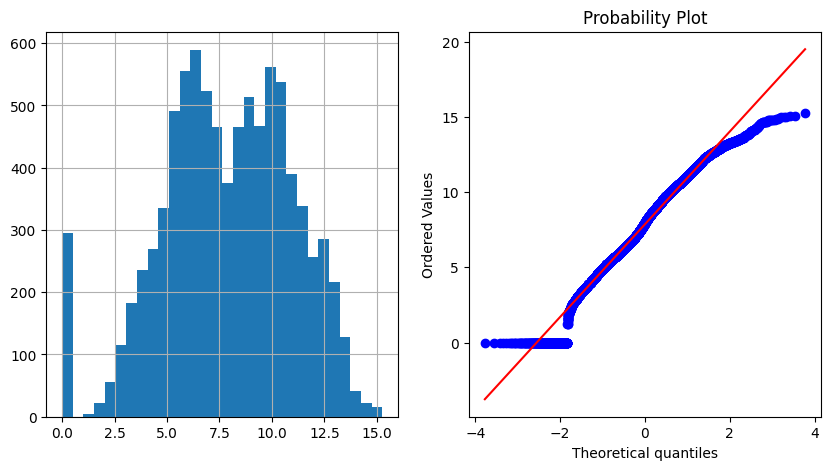

In [ ]:
data["RBC_qb"] = np.cbrt(data['Rented Bike Count'])
plotvraiable(data, "RBC_qb")

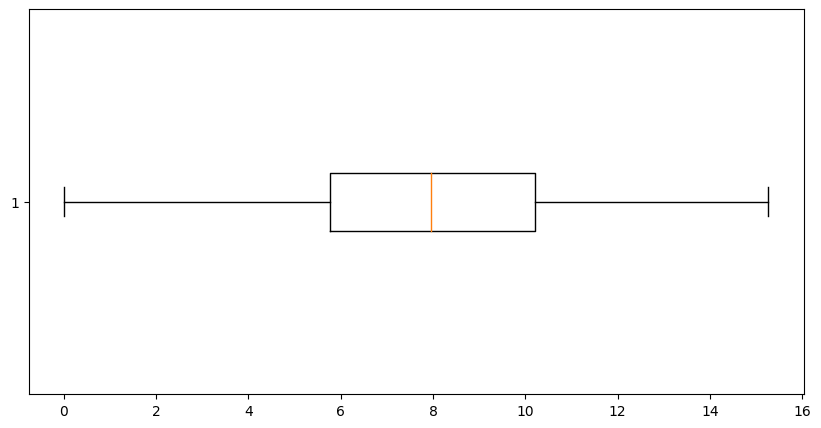

In [ ]:
plt.figure(figsize = (10,5))
plt.boxplot(data["RBC_qb"], vert = False)
plt.show()

### Identify Inputs and Targets
#### The column Rented Bike Count contains the value we need to predict i.e. it's the target column.
#### Data from all the other columns (except the 1st and the last columns) can be used as inputs to the model.


create a list 'x' of columns names containing data that can be used as input to train the model, and identify the target columns as the varaible y.

make sure that the date and rented Bike coiunt columns are not included in x.
Now that we'hve to identify the input and target columns , we can seperate input and target data.


In [ ]:
x = label_encoder_df.drop('Rented Bike Count', axis = 1)
y = label_encoder_df['Rented Bike Count']

Spliting the data into train and test part

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(6772, 13) (1693, 13) (6772,) (1693,)


In [ ]:
# For different model Accuracy checking using 
# We will transform our data using standardscalar transformation
def predict(ml_model, X,y):
  X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20,random_state = 10)
  stand_scal = StandardScaler()
  X_train = stand_scal.fit_transform(X_train)
  X_test = stand_scal.fit_transform(X_test)

  model = ml_model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  plt.scatter(y_pred, y_test, color = 'b')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  print(f'R^2 is {model.score(X_test, y_test)}\n Adj R^2 is {1-(1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is{mean_squared_error(y_test,y_pred, squared = False)}')

R^2-> 

R^2 is 0.588985980622134
 Adj R^2 is 0.5858036207341577
 RMSE is371.1281069781958


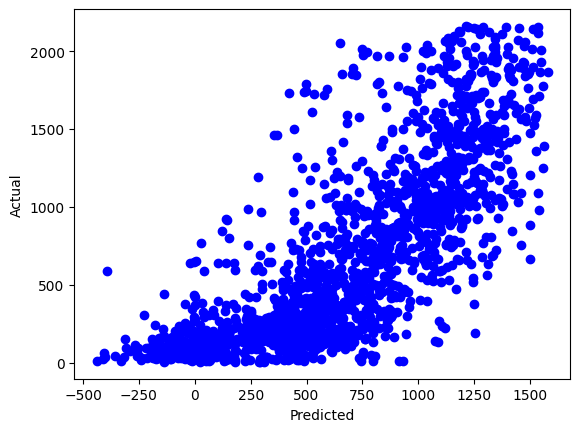

In [ ]:
# We will predict the values using LinearRegression model
predict(LinearRegression(),x,y)

R^2 is 0.7940725657015647
 Adj R^2 is 0.7924781305342748
 RMSE is262.6954997252537


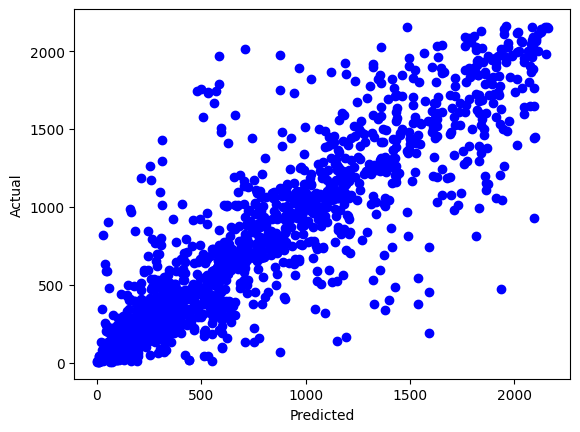

In [ ]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(), x,y)